###### Classifying Fashion-MNIST

In [1]:
import torch
from torchvision import datasets,transforms
import helper
#Define transform to normalize data
transform=transforms.Compose([transforms.ToTensor(),
                             transforms.Normalize((0.5,),(0.5,))])
#Download training data
trainset=datasets.FashionMNIST('~/pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
#Load training data
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
#Download test data
testset=datasets.FashionMNIST('~/pytorch/F_MNIST_data/',download=True,train=True,transform=transform)
#Load test data
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

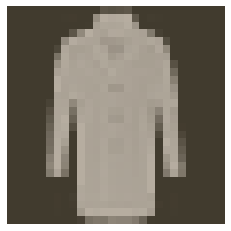

In [2]:
#To see one of the images
image,lable=next(iter(trainloader))
helper.imshow(image[0,:]);

###### Building the network

In [3]:
#Import laibraries
from torch import nn,optim
import torch.nn.functional as F

In [4]:
#Define network architecture 
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        #Define input layer   
        self.fc1 = nn.Linear(784, 256)
        #Define hidden layers
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        #Define output layer
        self.fc4 = nn.Linear(64, 10)
    #Define forward function    
    def forward(self,x):
        #flattened input tensor
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        return x

###### Train the network

In [5]:
#Create the network, define the criterion and optimizer
model=Network()
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.parameters(), lr=0.003)

In [6]:
#Train the network
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        #Training pass
        optimizer.zero_grad()
        #Backward pass
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.51604622735906
Training loss: 0.38850525641110917
Training loss: 0.35481073983760275
Training loss: 0.3299344910471551
Training loss: 0.3135825638760572


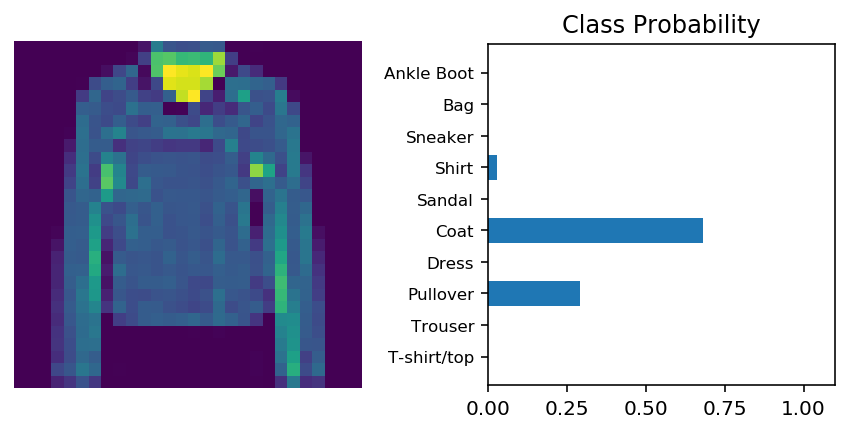

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import helper
# Test network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]
#Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))
# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')